## Remove old Weaviate DB files

In [1]:
!rm -rf ~/.local/share/weaviate

# Approximate Nearest Neighbors

First, we generate 40 random 2D vectors and a fixed "query" vector.
Then, we perform a brute-force nearest neighbor search to find the closest vectors to the query.
Then, we visualize all vectors, the query vector, and the nearest neighbor on a single plot using different colors and labels.

In [3]:
from random import random, randint
from math import floor, log
import networkx as nx
import numpy as np
import matplotlib as mtplt
from matplotlib import pyplot as plt
from utils_ import *

vec_num = 40 # Number of vectors (nodes)
dim = 2 ## Dimention. Set to be 2. All the graph plots are for dim 2. If changed, then plots should be commented.
m_nearest_neighbor = 2 # M Nearest Neigbor used in construction of the Navigable Small World (NSW)

vec_pos = np.random.uniform(size=(vec_num, dim))

### Query Vector

In [4]:
## Query
query_vec = [0.5, 0.5]

nodes = []
nodes.append(("Q",{"pos": query_vec}))

G_query = nx.Graph()
G_query.add_nodes_from(nodes)

print("nodes = ", nodes, flush=True)

pos_query=nx.get_node_attributes(G_query,'pos')

nodes =  [('Q', {'pos': [0.5, 0.5]})]


## Brute Force

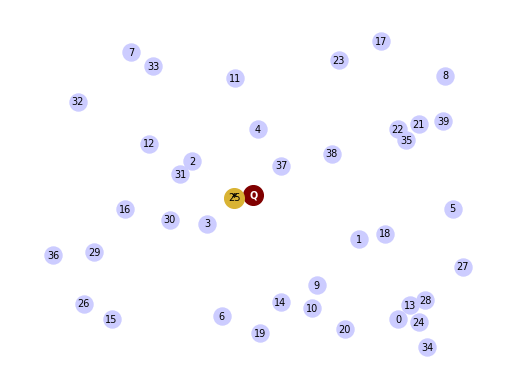

In [5]:
(G_lin, G_best) = nearest_neigbor(vec_pos,query_vec)

pos_lin=nx.get_node_attributes(G_lin,'pos')
pos_best=nx.get_node_attributes(G_best,'pos')

fig, axs = plt.subplots()

nx.draw(G_lin, pos_lin, with_labels=True, node_size=150, node_color=[[0.8,0.8,1]], width=0.0, font_size=7, ax = axs)
nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.5,0,0]], font_color='white', width=0.5, font_size=7, font_weight='bold', ax = axs)
nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)

### HNSW Construction

- This code visualizes a hierarchical graph structure built using the Hierarchical Navigable Small World (or HNSW) algorithm for approximate nearest neighbor search. 
- It iterates through the layers of the graph, from the sparsest (top) layer to the most detailed (bottom) layer, and draws each layer using the NetworkX library. 
- layer 0 is plotted with smaller nodes and lighter colors to represent dense connections, while higher layers have larger, more distinct nodes. 
- The query point is highlighted in red, and the best match to the query is emphasized in yellow, making it easy to visualize how the search progresses across the layers. 
- The visualization helps understand how HNSW navigates from sparse global searches to fine-grained local searches.

layer_i =  3


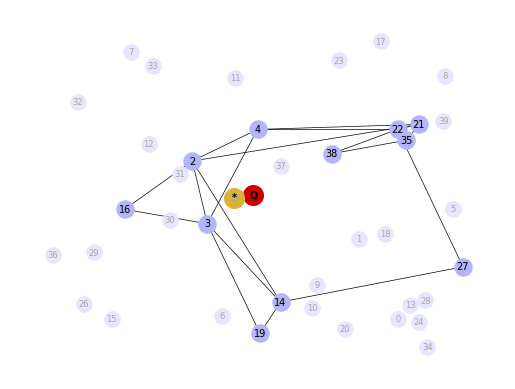

layer_i =  2


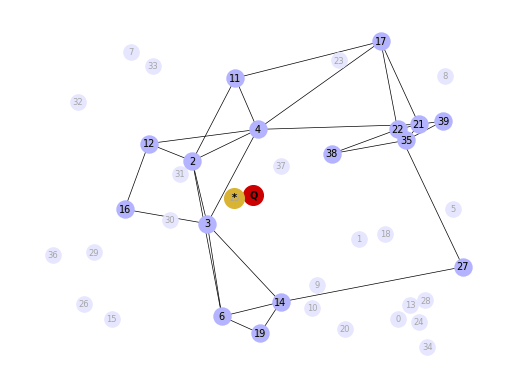

layer_i =  1


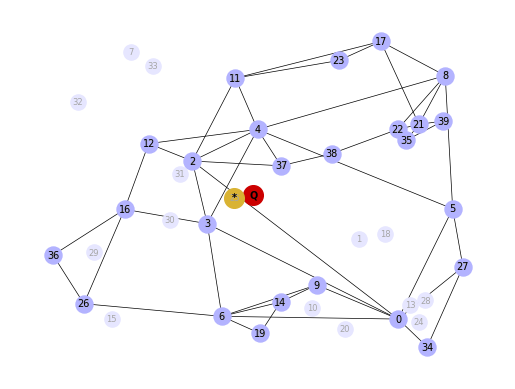

layer_i =  0


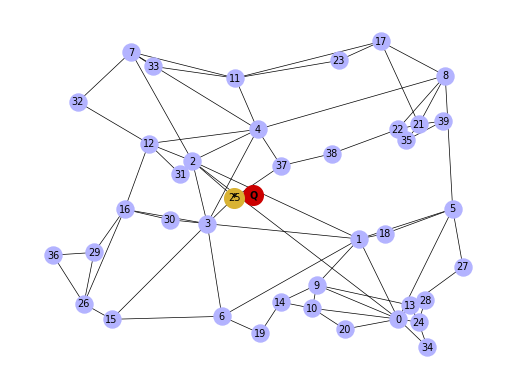

In [6]:
GraphArray = construct_HNSW(vec_pos,m_nearest_neighbor)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)

    if layer_i>0:
        pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
        nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=150, node_color=[[0.7,0.7,1]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=200, node_color=[[0.8,0,0]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=200, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, font_weight='bold', ax = axs)
    plt.show()

### HNSW Search

- visualizes different layers of a hierarchical navigable small-world (HNSW) graph. 
- The function search_HNSW likely performs a hierarchical search and returns the search paths and entry points at each graph layer (SearchPathGraphArray and EntryGraphArray). 
- For each layer in the hierarchy (from the top-most to the bottom-most layer), the script creates a new plot and visualizes multiple components: the main graph (GraphArray[layer_i]), the search path (G_path_layer), the query node (G_query), the nearest neighbor (G_best), and the entry points (G_entry). 
- When visualizing higher layers, it also shows the base layer graph (GraphArray[0]) in light gray for reference. Each component is drawn using different colors and node sizes to distinguish them in the layered search process.

layer_i =  3


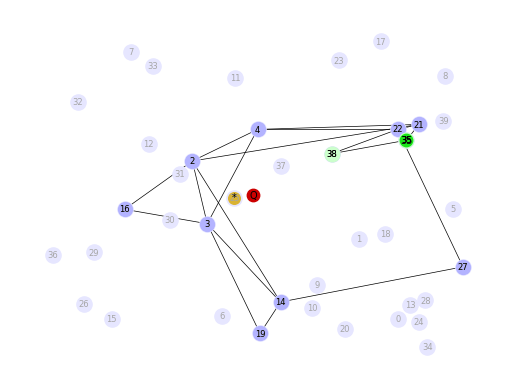

layer_i =  2


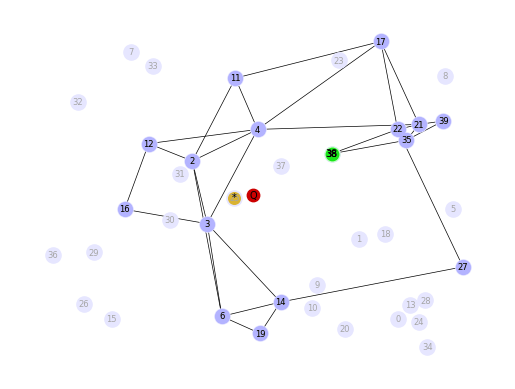

layer_i =  1


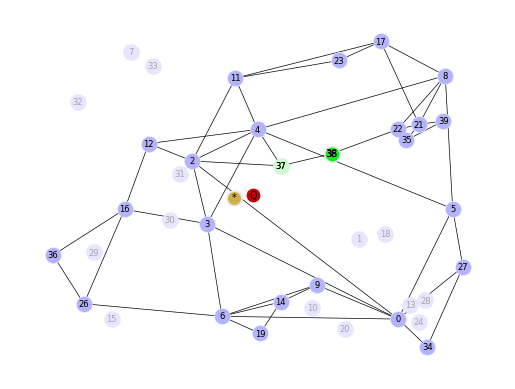

layer_i =  0


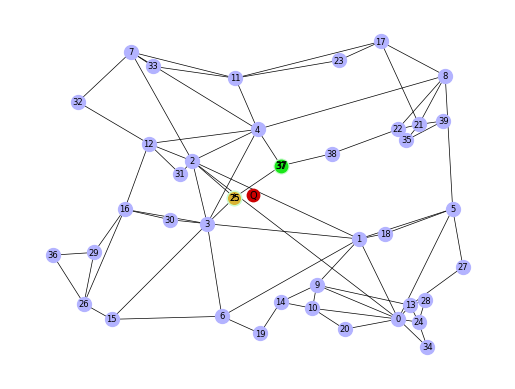

In [7]:
(SearchPathGraphArray, EntryGraphArray) = search_HNSW(GraphArray,G_query)

for layer_i in range(len(GraphArray)-1,-1,-1):
    fig, axs = plt.subplots()

    print("layer_i = ", layer_i)
    G_path_layer = SearchPathGraphArray[layer_i]
    pos_path = nx.get_node_attributes(G_path_layer,'pos')
    G_entry = EntryGraphArray[layer_i]
    pos_entry = nx.get_node_attributes(G_entry,'pos')

    if layer_i>0:
            pos_layer_0 = nx.get_node_attributes(GraphArray[0],'pos')
            nx.draw(GraphArray[0], pos_layer_0, with_labels=True, node_size=120, node_color=[[0.9,0.9,1]], width=0.0, font_size=6, font_color=(0.65,0.65,0.65), ax = axs)

    pos_layer_i = nx.get_node_attributes(GraphArray[layer_i],'pos')
    nx.draw(GraphArray[layer_i], pos_layer_i, with_labels=True, node_size=100, node_color=[[0.7,0.7,1]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_path_layer, pos_path, with_labels=True, node_size=110, node_color=[[0.8,1,0.8]], width=0.5, font_size=6, ax = axs)
    nx.draw(G_query, pos_query, with_labels=True, node_size=80, node_color=[[0.8,0,0]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_best, pos_best, with_labels=True, node_size=70, node_color=[[0.85,0.7,0.2]], width=0.5, font_size=7, ax = axs)
    nx.draw(G_entry, pos_entry, with_labels=True, node_size=80, node_color=[[0.1,0.9,0.1]], width=0.5, font_size=7, ax = axs)
    plt.show()

## Pure Vector Search - with a vector database

In [11]:
# !pip install weaviate-client

In [12]:
import weaviate, json
from weaviate import EmbeddedOptions

client = weaviate.Client(
    embedded_options=EmbeddedOptions(),
)

client.is_ready()

<ipython-input-12-4bcb42bee41f>:4: DeprecationWarning: 
Python client v3 `weaviate.Client(...)` connections and methods are deprecated and will
            be removed by 2024-11-30.

            Upgrade your code to use Python client v4 `weaviate.WeaviateClient` connections and methods.
                - For Python Client v4 usage, see: https://weaviate.io/developers/weaviate/client-libraries/python
                - For code migration, see: https://weaviate.io/developers/weaviate/client-libraries/python/v3_v4_migration

            If you have to use v3 code, install the v3 client and pin the v3 dependency in your requirements file: `weaviate-client>=3.26.7;<4.0.0`
  client = weaviate.Client(
INFO:weaviate-client:Binary /root/.cache/weaviate-embedded did not exist. Downloading binary from https://github.com/weaviate/weaviate/releases/download/v1.26.6/weaviate-v1.26.6-Linux-amd64.tar.gz
INFO:weaviate-client:Started /root/.cache/weaviate-embedded: process ID 1390


True

In [13]:
# resetting the schema. CAUTION: This will delete your collection
# if client.schema.exists("MyCollection"):
#     client.schema.delete_class("MyCollection")

schema = {
    "class": "MyCollection",
    "vectorizer": "none",
    "vectorIndexConfig": {
        "distance": "cosine" # let's use cosine distance
    },
}

client.schema.create_class(schema)

print("Successfully created the schema.")

Successfully created the schema.


### Import the Data

In [14]:
data = [
   {
      "title": "First Object",
      "foo": 99,
      "vector": [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
   },
   {
      "title": "Second Object",
      "foo": 77,
      "vector": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7]
   },
   {
      "title": "Third Object",
      "foo": 55,
      "vector": [0.3, 0.1, -0.1, -0.3, -0.5, -0.7]
   },
   {
      "title": "Fourth Object",
      "foo": 33,
      "vector": [0.4, 0.41, 0.42, 0.43, 0.44, 0.45]
   },
   {
      "title": "Fifth Object",
      "foo": 11,
      "vector": [0.5, 0.5, 0, 0, 0, 0]
   },
]

In [15]:
client.batch.configure(batch_size=10)  # Configure batch

# Batch import all objects
# yes batch is an overkill for 5 objects, but it is recommended for large volumes of data
with client.batch as batch:
  for item in data:

      properties = {
         "title": item["title"],
         "foo": item["foo"],
      }

      # the call that performs data insert
      client.batch.add_data_object(
         class_name="MyCollection",
         data_object=properties,
         vector=item["vector"] # your vector embeddings go here
      )


In [16]:
# Check number of objects
response = (
    client.query
    .aggregate("MyCollection")
    .with_meta_count()
    .do()
)

print(response)

{'data': {'Aggregate': {'MyCollection': [{'meta': {'count': 5}}]}}}


### Query Weaviate: Vector Search (vector embeddings)

In [17]:
response = (
    client.query
    .get("MyCollection", ["title"])
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    })
    .with_limit(2) # limit the output to only 2
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "title": "Second Object"
  },
  {
    "title": "Fourth Object"
  }
]


In [18]:
response = (
    client.query
    .get("MyCollection", ["title"])
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    })
    .with_limit(2) # limit the output to only 2
    .with_additional(["distance", "vector, id"])
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0.6506307,
      "id": "e16aae19-67a1-4ed0-b3a6-9650b801b8cf",
      "vector": [
        0.2,
        0.3,
        0.4,
        0.5,
        0.6,
        0.7
      ]
    },
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.8072029,
      "id": "9e40c12d-c50b-4925-afdd-0326adb29093",
      "vector": [
        0.4,
        0.41,
        0.42,
        0.43,
        0.44,
        0.45
      ]
    },
    "title": "Fourth Object"
  }
]


### Vector Search with filters

In [19]:
response = (
    client.query
    .get("MyCollection", ["title", "foo"])
    .with_near_vector({
        "vector": [-0.012, 0.021, -0.23, -0.42, 0.5, 0.5]
    })
    .with_additional(["distance, id"]) # output the distance of the query vector to the objects in the database
    .with_where({
        "path": ["foo"],
        "operator": "GreaterThan",
        "valueNumber": 44
    })
    .with_limit(2) # limit the output to only 2
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0.6506307,
      "id": "e16aae19-67a1-4ed0-b3a6-9650b801b8cf"
    },
    "foo": 77,
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.8284496,
      "id": "c850efe1-6566-4f11-b69b-0d55aebb77be"
    },
    "foo": 99,
    "title": "First Object"
  }
]


### nearObject Example

In [20]:
response = (
    client.query
    .get("MyCollection", ["title"])
    .with_near_object({ # the id of the the search object
        "id": result[0]['_additional']['id']
    })
    .with_limit(3)
    .with_additional(["distance"])
    .do()
)

result = response["data"]["Get"]["MyCollection"]
print(json.dumps(result, indent=2))

[
  {
    "_additional": {
      "distance": 0
    },
    "title": "Second Object"
  },
  {
    "_additional": {
      "distance": 0.051573694
    },
    "title": "Fourth Object"
  },
  {
    "_additional": {
      "distance": 0.06506646
    },
    "title": "First Object"
  }
]
